In [35]:
# Necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats

In [3]:
# Load the data
Land_Data = pd.read_csv("C:/Users/rfull/OneDrive/Documents/Summer Research Project/Landscaping_Data.csv")

In [5]:
# Remove the columns of data which are non numeric
Land_Data = Land_Data.drop(Land_Data.columns[[20]], axis = 1)
Land_Data.head()

,Date,Plant_Type,Plant_Size,Low,High,Temp_Diff,Rain,Growth,Pruned,Quadrant,Shade,UV,Humidity,Dew_Point,Pressure,Wind_Gust,Cloud_Cover,Visibility,AQI,Pollen
0,5/10/2025,Flowering,Large,49,73,24,0.0,0.6,Yes,2,Dark,8,0.34,47,30.34,7,0.09,9.7,51,43
1,5/10/2025,Nonflowering,Medium,49,73,24,0.0,0.0,Yes,3,Neutral,8,0.34,47,30.34,7,0.09,9.7,51,43
2,5/10/2025,Nonflowering,Small,49,73,24,0.0,0.0,Yes,3,Neutral,8,0.34,47,30.34,7,0.09,9.7,51,43
3,5/10/2025,Nonflowering,Medium,49,73,24,0.0,0.0,Yes,3,Bright,8,0.34,47,30.34,7,0.09,9.7,51,43
4,5/10/2025,Nonflowering,Medium,49,73,24,0.0,0.3,Yes,3,Bright,8,0.34,47,30.34,7,0.09,9.7,51,43


In [7]:
# Convert to pandas datetime
Land_Data['Date'] = pd.to_datetime(Land_Data['Date'])

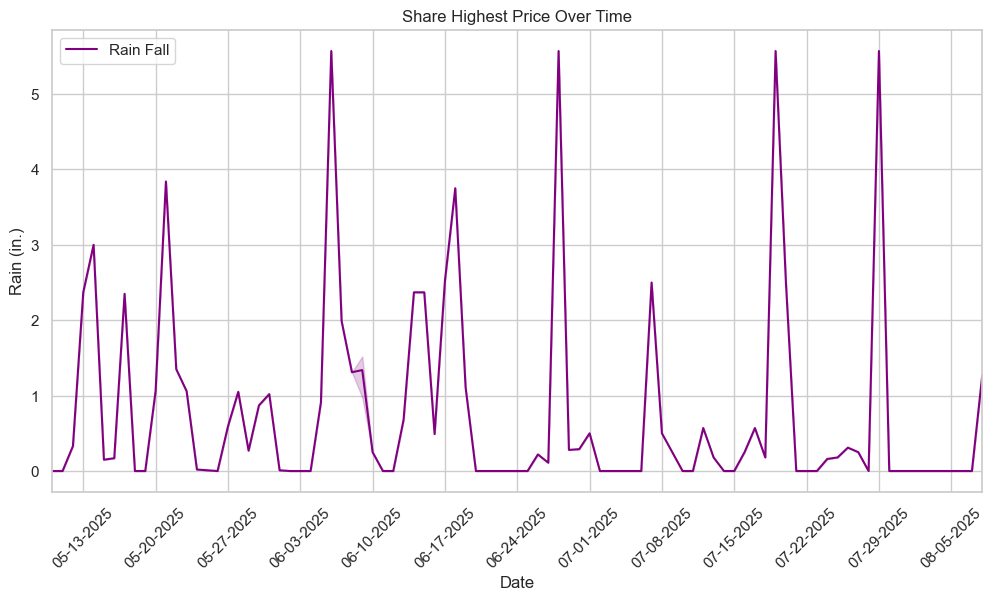

In [9]:
# Time Series Plot
# Rain

# Set style
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6))

# Sort Dates
Land_data = Land_Data.sort_values(by = 'Date')

# Time Series
sns.lineplot(data = Land_Data, x = 'Date', y = 'Rain', label = 'Rain Fall', color = 'purple')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval = 1))
plt.xticks(rotation=45)
plt.xlim(Land_Data['Date'].min(), Land_Data['Date'].max())
plt.xlabel('Date')
plt.ylabel('Rain (in.)')
plt.title('Share Highest Price Over Time')
plt.show()

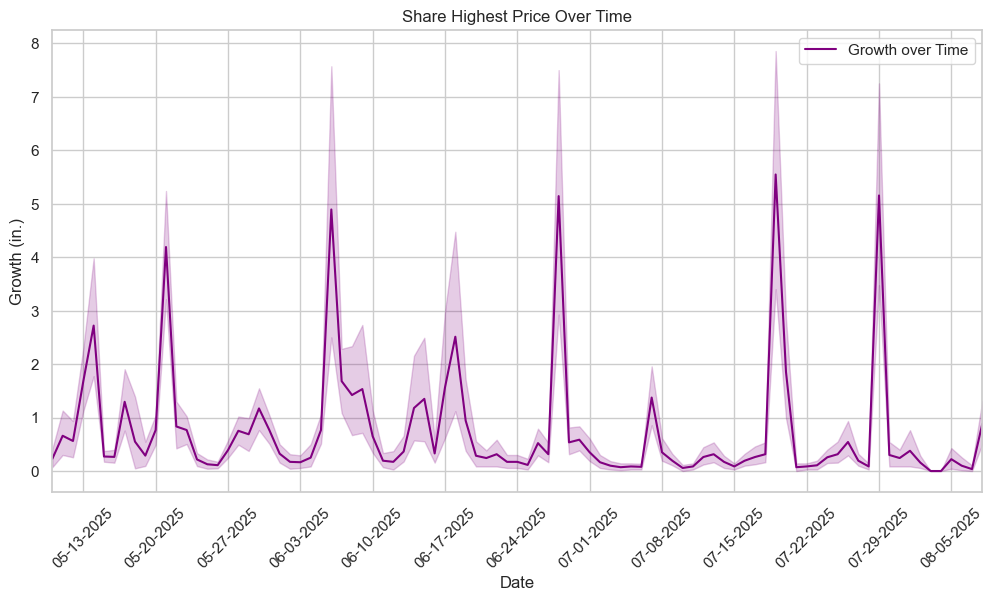

In [21]:
# Time Series Plot
# Growth

# Set style
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6))

# Sort Dates
Land_data = Land_Data.sort_values(by = 'Date')

# Time Series
sns.lineplot(data = Land_Data, x = 'Date', y = 'Growth', label = 'Growth over Time', color = 'purple')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval = 1))
plt.xticks(rotation=45)
plt.xlim(Land_Data['Date'].min(), Land_Data['Date'].max())
plt.xlabel('Date')
plt.ylabel('Growth (in.)')
plt.title('Share Highest Price Over Time')
plt.show()

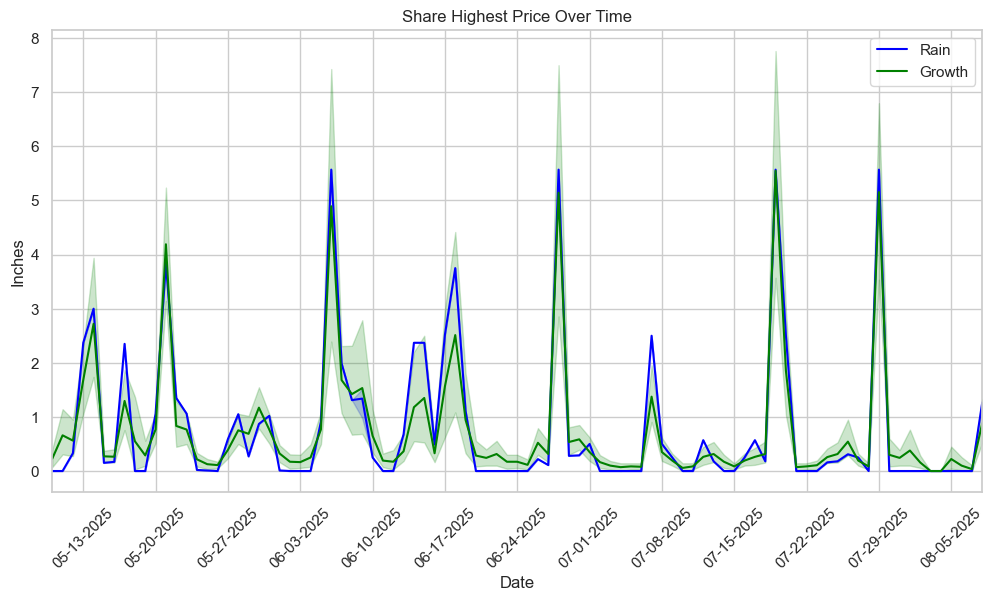

In [10]:
# Overlayed Time Series Plot

# Create basic plots of Rain and Growth
# Set style
sns.set(style="whitegrid") 
plt.figure(figsize=(12, 6))

# Sort Dates
Land_data = Land_Data.sort_values(by = 'Date')

# Time Series
sns.lineplot(data = Land_Data, x = 'Date', y = 'Rain', color = 'blue', label = 'Rain') # Rain
sns.lineplot(data = Land_Data, x = 'Date', y = 'Growth', color = 'green', label = 'Growth') # Growth

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval = 1))
plt.xticks(rotation=45)
plt.xlim(Land_Data['Date'].min(), Land_Data['Date'].max())
plt.xlabel('Date')
plt.ylabel('Inches')
plt.title('Share Highest Price Over Time')
plt.show()

<Figure size 1200x600 with 0 Axes>

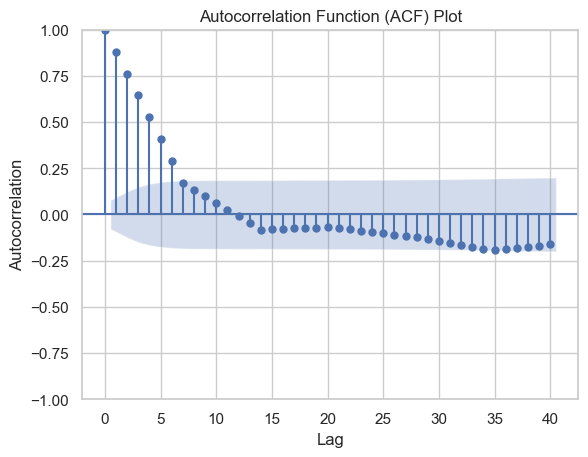

In [13]:
# Testing for Autocorrelation and Seasonality (Rain)
if 'Date' not in Land_Data.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    Land_Data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plot_acf(Land_Data['Rain'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

<Figure size 1000x600 with 0 Axes>

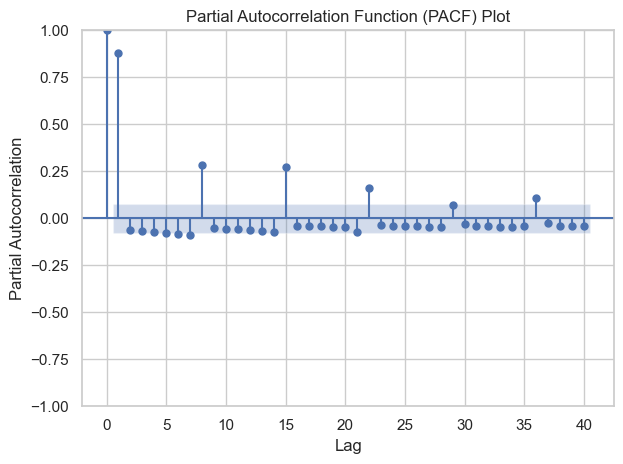

In [15]:
# Plot the PACF (Rain)
plt.figure(figsize=(10, 6))
plot_pacf(Land_Data['Rain'], lags=40, method='ywmle', alpha=0.05)  # method='ywmle' gives stable results
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

'Date' is already the index or not present in the DataFrame.


<Figure size 1200x600 with 0 Axes>

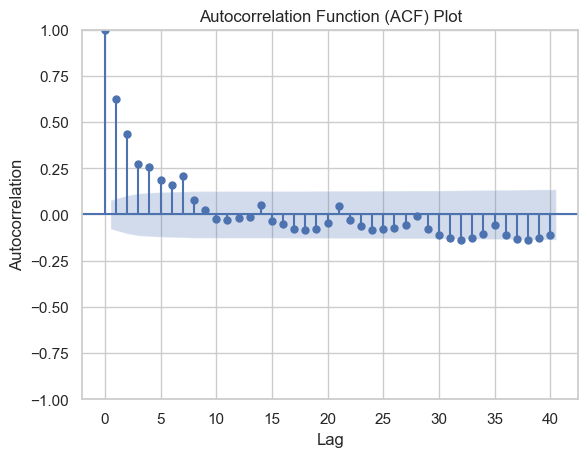

In [17]:
# Testing for Autocorrelation and Seasonality (Growth)
if 'Date' not in Land_Data.columns:
    print("'Date' is already the index or not present in the DataFrame.")
else:
    Land_Data.set_index('Date', inplace=True)

plt.figure(figsize=(12, 6))
plot_acf(Land_Data['Growth'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

<Figure size 1000x600 with 0 Axes>

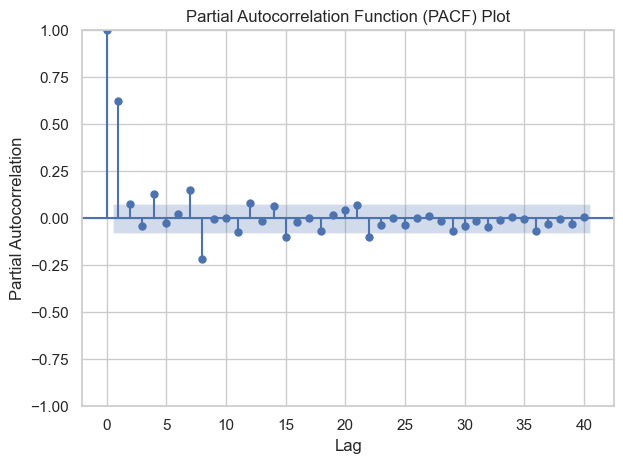

In [109]:
# Plot the PACF (Growth)
plt.figure(figsize=(10, 6))
plot_pacf(Land_Data['Growth'], lags=40, method='ywmle', alpha=0.05)  # method='ywmle' gives stable results
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
# Stationarity Test (Rain)
from statsmodels.tsa.stattools import adfuller

result = adfuller(Land_Data['Rain'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -4.936174927167968
p-value: 2.9639879489727728e-05
Critical Values: {'1%': -3.4409070618215996, '5%': -2.8661978948030686, '10%': -2.569250572471335}


In [21]:
# Stationarity Test (Growth)
from statsmodels.tsa.stattools import adfuller

result = adfuller(Land_Data['Growth'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

ADF Statistic: -5.902161020801421
p-value: 2.761741933091486e-07
Critical Values: {'1%': -3.4409070618215996, '5%': -2.8661978948030686, '10%': -2.569250572471335}


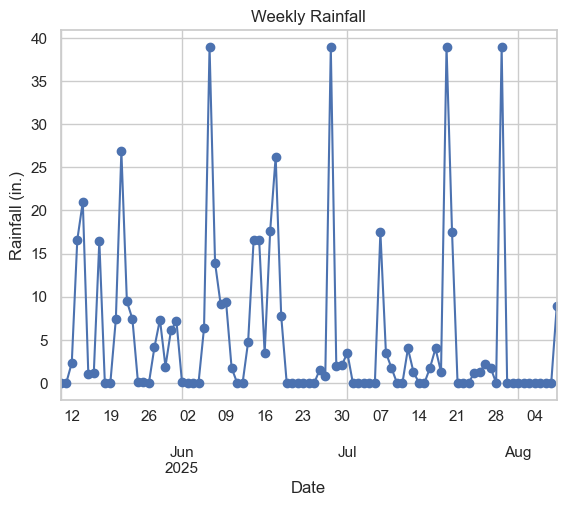

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


                            AutoReg Model Results                             
Dep. Variable:                   Rain   No. Observations:                   91
Model:                     AutoReg(1)   Log Likelihood                -329.298
Method:               Conditional MLE   S.D. of innovations              9.393
Date:                Sun, 10 Aug 2025   AIC                            664.597
Time:                        11:41:49   BIC                            672.096
Sample:                    05-11-2025   HQIC                           667.621
                         - 08-08-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6660      1.143      4.083      0.000       2.426       6.906
Rain.L1        0.1693      0.104      1.632      0.103      -0.034       0.373
                                    Roots           

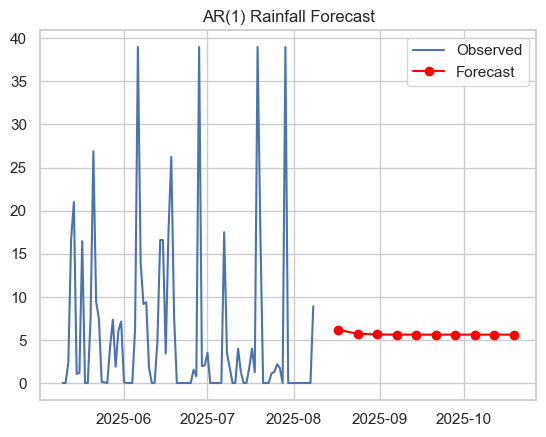

In [43]:
# Convert Date column to datetime and sort
Land_Data = Land_data.sort_values('Date')

# Aggregate Rain by date (sum for total rainfall)
rain_weekly = Land_Data.groupby('Date')['Rain'].sum()

# Plot the time series
rain_weekly.plot(title = "Weekly Rainfall", marker='o')
plt.ylabel("Rainfall (in.)")
plt.show()

# Fit AR(1) model
Rainmodel = AutoReg(rain_weekly, lags = 1, old_names = False)
model_fit = Rainmodel.fit()

# Print summary
print(model_fit.summary())

# Forecast next 10 weeks
forecast_steps = 10
preds = model_fit.predict(
    start = len(rain_weekly),
    end = len(rain_weekly) + forecast_steps - 1
)

print("\nRainfall Forecast (in.):")
print(preds)

# Forecast
forecast_steps = 10
preds = model_fit.predict(
    start=len(rain_weekly),
    end=len(rain_weekly) + forecast_steps - 1
)

# Create future dates
future_dates = pd.date_range(
    start=rain_weekly.index[-1] + pd.Timedelta(weeks=1),
    periods=forecast_steps,
    freq='W'
)

# Assign proper datetime index to forecast
preds.index = future_dates

# Plot forecasted vs. historic
plt.plot(rain_weekly.index, rain_weekly, label="Observed")
plt.plot(preds.index, preds, label="Forecast", marker='o', color='red')
plt.legend()
plt.title("AR(1) Rainfall Forecast")
plt.show()

<Figure size 600x400 with 0 Axes>

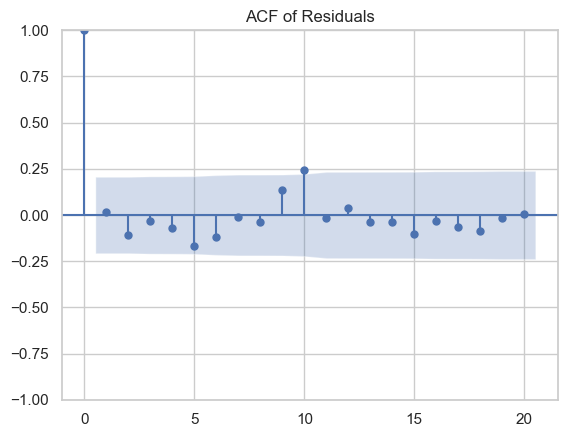

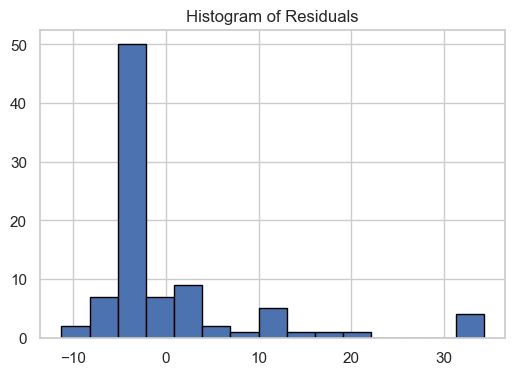

Shapiro-Wilk test p-value: 0.0000
Residuals deviate from normality.

Ljung–Box test results (lag=10):
      lb_stat  lb_pvalue
10  13.809212   0.181873
No significant autocorrelation left in residuals — good fit.


In [45]:
#  Get residuals from the fitted model
residuals = model_fit.resid

# -----------------------
# ACF plot of residuals
# -----------------------
plt.figure(figsize=(6,4))
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()

# -----------------------
#  Histogram + normality test
# -----------------------
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=15, edgecolor='black')
plt.title("Histogram of Residuals")
plt.show()

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Residuals look roughly normal.")
else:
    print("Residuals deviate from normality.")

# -----------------------
#  Ljung–Box test
# -----------------------
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung–Box test results (lag=10):")
print(lb_test)

if lb_test['lb_pvalue'].iloc[0] > 0.05:
    print("No significant autocorrelation left in residuals — good fit.")
else:
    print("Residuals show autocorrelation — model may be improved.")

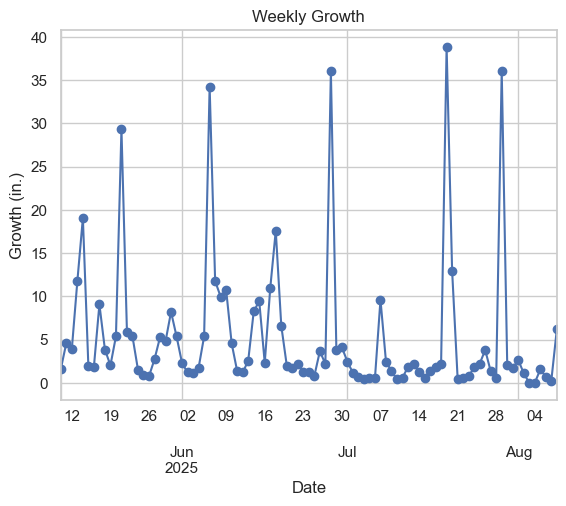

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


                            AutoReg Model Results                             
Dep. Variable:                 Growth   No. Observations:                   91
Model:                     AutoReg(1)   Log Likelihood                -315.590
Method:               Conditional MLE   S.D. of innovations              8.066
Date:                Sun, 10 Aug 2025   AIC                            637.179
Time:                        11:40:29   BIC                            644.679
Sample:                    05-11-2025   HQIC                           640.204
                         - 08-08-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.7007      1.015      4.630      0.000       2.711       6.691
Growth.L1      0.1249      0.104      1.196      0.232      -0.080       0.330
                                    Roots           

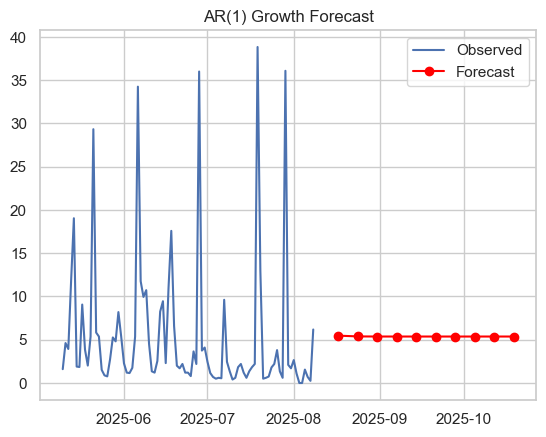

In [39]:
# Convert Date column to datetime and sort
Land_Data = Land_data.sort_values('Date')

# Aggregate Rain by date (sum for total rainfall)
rain_weekly = Land_Data.groupby('Date')['Growth'].sum()

# Plot the time series
rain_weekly.plot(title = "Weekly Growth", marker='o')
plt.ylabel("Growth (in.)")
plt.show()

# Fit AR(1) model
Growthmodel = AutoReg(rain_weekly, lags = 1, old_names = False)
model_fit = Growthmodel.fit()

# Print summary
print(model_fit.summary())

# Forecast next 10 weeks
forecast_steps = 10
preds = model_fit.predict(
    start = len(rain_weekly),
    end = len(rain_weekly) + forecast_steps - 1
)

print("\nGrowth Forecast (in.):")
print(preds)

# Forecast
forecast_steps = 10
preds = model_fit.predict(
    start=len(rain_weekly),
    end=len(rain_weekly) + forecast_steps - 1
)

# Create future dates
future_dates = pd.date_range(
    start=rain_weekly.index[-1] + pd.Timedelta(weeks=1),
    periods=forecast_steps,
    freq='W'
)

# Assign proper datetime index to forecast
preds.index = future_dates

# Plot forecasted vs. historic
plt.plot(rain_weekly.index, rain_weekly, label="Observed")
plt.plot(preds.index, preds, label="Forecast", marker='o', color='red')
plt.legend()
plt.title("AR(1) Growth Forecast")
plt.show()


<Figure size 600x400 with 0 Axes>

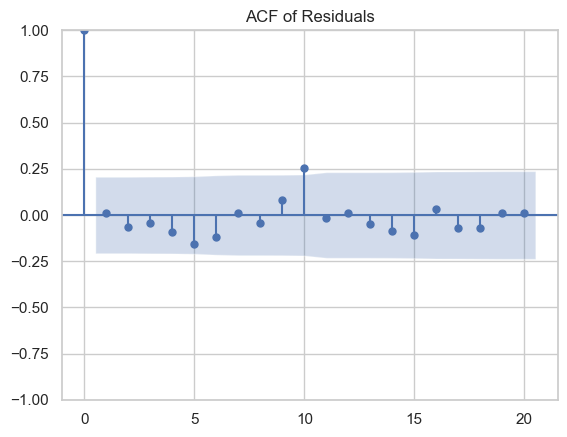

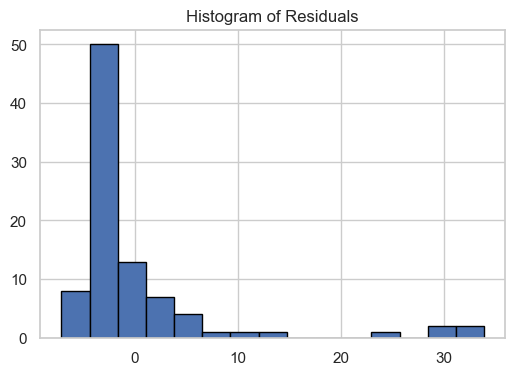

Shapiro-Wilk test p-value: 0.0000
Residuals deviate from normality.

Ljung–Box test results (lag=10):
     lb_stat  lb_pvalue
10  12.83537   0.233023
No significant autocorrelation left in residuals — good fit.


In [41]:
#  Get residuals from the fitted model
residuals = model_fit.resid

# -----------------------
# ACF plot of residuals
# -----------------------
plt.figure(figsize=(6,4))
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()

# -----------------------
#  Histogram + normality test
# -----------------------
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=15, edgecolor='black')
plt.title("Histogram of Residuals")
plt.show()

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Residuals look roughly normal.")
else:
    print("Residuals deviate from normality.")

# -----------------------
#  Ljung–Box test
# -----------------------
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung–Box test results (lag=10):")
print(lb_test)

if lb_test['lb_pvalue'].iloc[0] > 0.05:
    print("No significant autocorrelation left in residuals — good fit.")
else:
    print("Residuals show autocorrelation — model may be improved.")

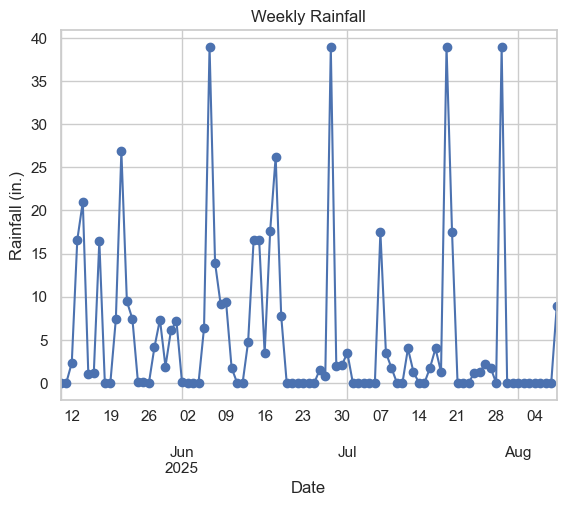

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


                            AutoReg Model Results                             
Dep. Variable:                   Rain   No. Observations:                   91
Model:                    AutoReg(16)   Log Likelihood                -269.174
Method:               Conditional MLE   S.D. of innovations              8.759
Date:                Sun, 10 Aug 2025   AIC                            574.348
Time:                        11:54:47   BIC                            616.063
Sample:                    05-26-2025   HQIC                           591.004
                         - 08-08-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6197      3.390      1.658      0.097      -1.024      12.264
Rain.L1        0.1130      0.116      0.976      0.329      -0.114       0.340
Rain.L2       -0.0941      0.117     -0.804      0.4

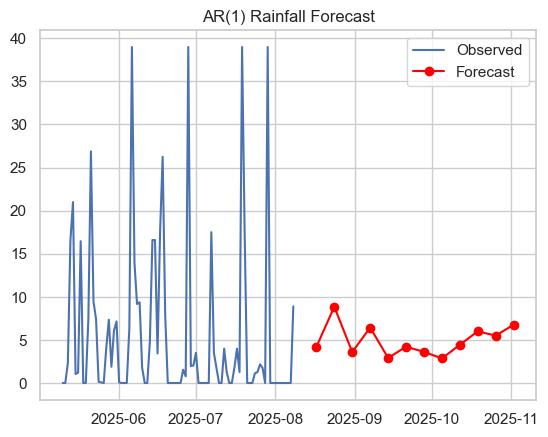

In [ ]:
# Convert Date column to datetime and sort
Land_Data = Land_data.sort_values('Date')

# Aggregate Rain by date (sum for total rainfall)
rain_weekly = Land_Data.groupby('Date')['Rain'].sum()

# Plot the time series
rain_weekly.plot(title = "Weekly Rainfall", marker='o')
plt.ylabel("Rainfall (in.)")
plt.show()

# Fit AR(16) model
Rainmodel = AutoReg(rain_weekly, lags = 16, old_names = False)
model_fit = Rainmodel.fit()

# Print summary
print(model_fit.summary())

# Forecast next 10 weeks
forecast_steps = 10
preds = model_fit.predict(
    start = len(rain_weekly),
    end = len(rain_weekly) + forecast_steps - 1
)

print("\nRainfall Forecast (in.):")
print(preds)

# Forecast
forecast_steps = 12
preds = model_fit.predict(
    start=len(rain_weekly),
    end=len(rain_weekly) + forecast_steps - 1
)

# Create future dates
future_dates = pd.date_range(
    start=rain_weekly.index[-1] + pd.Timedelta(weeks=1),
    periods=forecast_steps,
    freq='W'
)

# Assign proper datetime index to forecast
preds.index = future_dates

# Plot forecasted vs. historic
plt.plot(rain_weekly.index, rain_weekly, label="Observed")
plt.plot(preds.index, preds, label="Forecast", marker='o', color='red')
plt.legend()
plt.title("AR(1) Rainfall Forecast")
plt.show()

<Figure size 600x400 with 0 Axes>

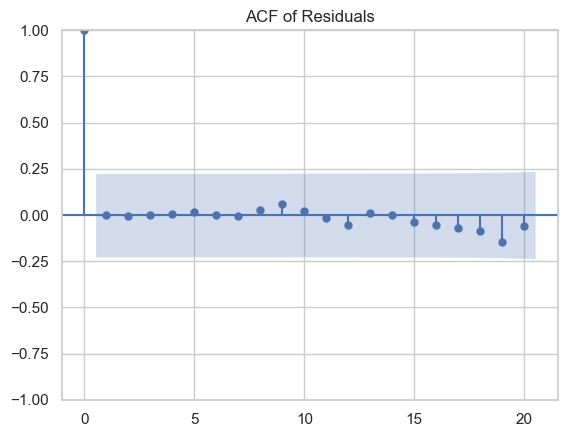

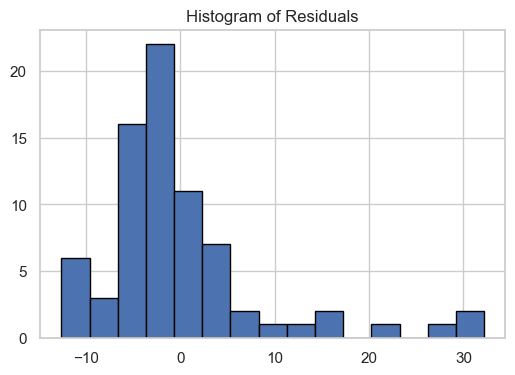

Shapiro-Wilk test p-value: 0.0000
Residuals deviate from normality.

Ljung–Box test results (lag=10):
     lb_stat  lb_pvalue
10  0.423258   0.999997
No significant autocorrelation left in residuals — good fit.


In [73]:
#  Get residuals from the fitted model
residuals = model_fit.resid

# -----------------------
# ACF plot of residuals
# -----------------------
plt.figure(figsize=(6,4))
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()

# -----------------------
#  Histogram + normality test
# -----------------------
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=15, edgecolor='black')
plt.title("Histogram of Residuals")
plt.show()

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Residuals look roughly normal.")
else:
    print("Residuals deviate from normality.")

# -----------------------
#  Ljung–Box test
# -----------------------
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung–Box test results (lag=10):")
print(lb_test)

if lb_test['lb_pvalue'].iloc[0] > 0.05:
    print("No significant autocorrelation left in residuals — good fit.")
else:
    print("Residuals show autocorrelation — model may be improved.")

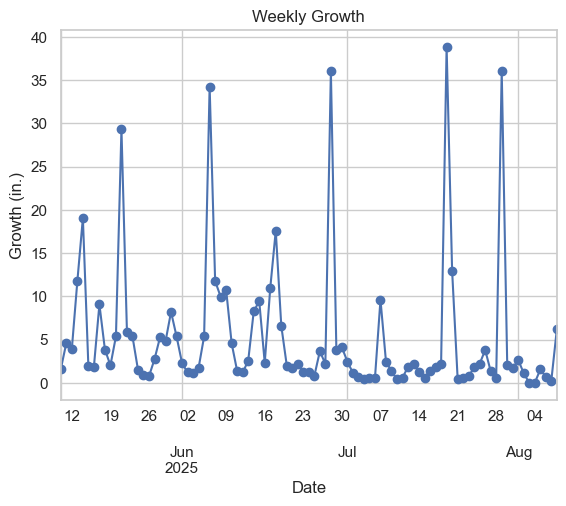

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


                            AutoReg Model Results                             
Dep. Variable:                 Growth   No. Observations:                   91
Model:                    AutoReg(16)   Log Likelihood                -257.667
Method:               Conditional MLE   S.D. of innovations              7.513
Date:                Sun, 10 Aug 2025   AIC                            551.333
Time:                        11:56:39   BIC                            593.048
Sample:                    05-26-2025   HQIC                           567.990
                         - 08-08-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7614      3.341      2.024      0.043       0.213      13.310
Growth.L1      0.0808      0.116      0.696      0.487      -0.147       0.309
Growth.L2     -0.0628      0.117     -0.538      0.5

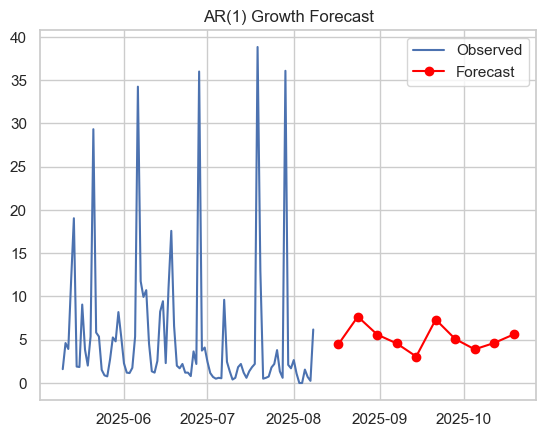

In [ ]:
# Convert Date column to datetime and sort
Land_Data = Land_data.sort_values('Date')

# Aggregate Rain by date (sum for total rainfall)
rain_weekly = Land_Data.groupby('Date')['Growth'].sum()

# Plot the time series
rain_weekly.plot(title = "Weekly Growth", marker='o')
plt.ylabel("Growth (in.)")
plt.show()

# Fit AR(16) model
Growthmodel = AutoReg(rain_weekly, lags = 16, old_names = False)
model_fit = Growthmodel.fit()

# Print summary
print(model_fit.summary())

# Forecast next 10 weeks
forecast_steps = 10
preds = model_fit.predict(
    start = len(rain_weekly),
    end = len(rain_weekly) + forecast_steps - 1
)

print("\nGrowth Forecast (in.):")
print(preds)

# Forecast
forecast_steps = 10
preds = model_fit.predict(
    start=len(rain_weekly),
    end=len(rain_weekly) + forecast_steps - 1
)

# Create future dates
future_dates = pd.date_range(
    start=rain_weekly.index[-1] + pd.Timedelta(weeks=1),
    periods=forecast_steps,
    freq='W'
)

# Assign proper datetime index to forecast
preds.index = future_dates

# Plot forecasted vs. historic
plt.plot(rain_weekly.index, rain_weekly, label="Observed")
plt.plot(preds.index, preds, label="Forecast", marker='o', color='red')
plt.legend()
plt.title("AR(1) Growth Forecast")
plt.show()


<Figure size 600x400 with 0 Axes>

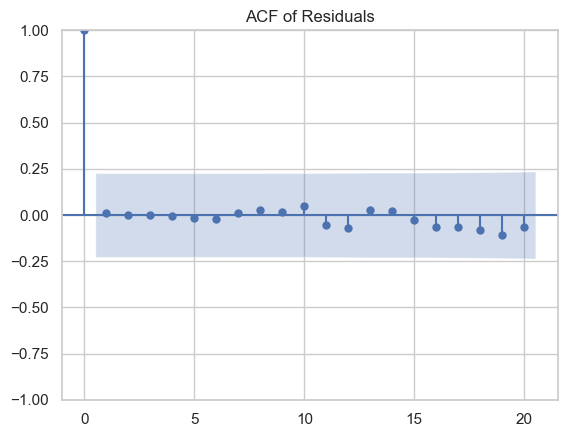

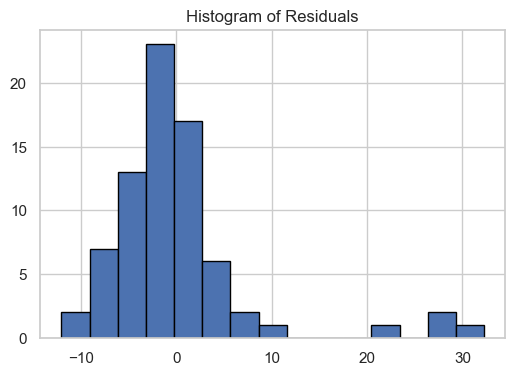

Shapiro-Wilk test p-value: 0.0000
Residuals deviate from normality.

Ljung–Box test results (lag=10):
     lb_stat  lb_pvalue
10  0.393271   0.999998
No significant autocorrelation left in residuals — good fit.


In [81]:
#  Get residuals from the fitted model
residuals = model_fit.resid

# -----------------------
# ACF plot of residuals
# -----------------------
plt.figure(figsize=(6,4))
plot_acf(residuals, lags=20)
plt.title("ACF of Residuals")
plt.show()

# -----------------------
#  Histogram + normality test
# -----------------------
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=15, edgecolor='black')
plt.title("Histogram of Residuals")
plt.show()

# Shapiro-Wilk test for normality
shapiro_stat, shapiro_p = stats.shapiro(residuals)
print(f"Shapiro-Wilk test p-value: {shapiro_p:.4f}")
if shapiro_p > 0.05:
    print("Residuals look roughly normal.")
else:
    print("Residuals deviate from normality.")

# -----------------------
#  Ljung–Box test
# -----------------------
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("\nLjung–Box test results (lag=10):")
print(lb_test)

if lb_test['lb_pvalue'].iloc[0] > 0.05:
    print("No significant autocorrelation left in residuals — good fit.")
else:
    print("Residuals show autocorrelation — model may be improved.")